# Experiment 1 Results

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from get_results import read_results,get_performance_profiles

In [2]:
df = read_results("../results.csv")

In [3]:
df.head()

,name,timelimit,type,num,solver,lp_tangent,solvetime,obj_val,bound,iterations,LPcuts,IPcuts,gap,dev
0,cdp_GKD-b_14_n50_b03_m5_3_repoa_False,600.0,CDP,50,repoa,False,0.021537,28745.3,28745.3,2,0,3,0.0,8.859136e-16
1,cdp_GKD-b_18_n50_b03_m15_3_repoa_False,600.0,CDP,50,repoa,False,0.086337,40045.1,40045.1,4,0,5,0.0,0.000000e+00
2,cdp_GKD-b_45_n150_b03_m15_3_repoa_False,600.0,CDP,150,repoa,False,0.097537,414013.7,414013.7,2,0,3,0.0,0.000000e+00
3,cdp_GKD-b_14_n50_b03_m5_3_repoa_rootonly,600.0,CDP,50,repoa,rootonly,0.092210,28745.3,28745.3,2,2,3,0.0,8.859136e-16
4,cdp_GKD-b_47_n150_b02_m45_2_repoa_False,600.0,CDP,150,repoa,False,0.141964,389015.6,389015.6,3,0,4,0.0,2.209281e-05


# CDP

In [4]:
df_cdp = df[df["type"] == "CDP"]
num_test_cdp = 60

In [5]:
df_cdp[df_cdp['solver']=='fcard']['solvetime'].max()

4.248178958892822

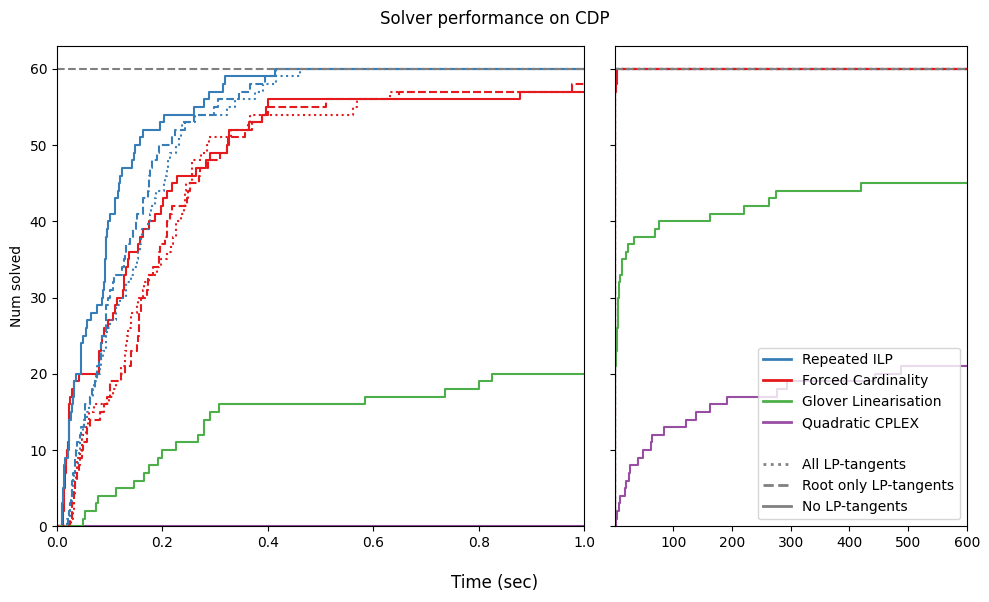

In [6]:
_df = df_cdp
pp = get_performance_profiles(_df)
middle_time = 1

CM = dict(zip(["fcard","repoa","glover","quad"],[mpl.colormaps["Set1"](i) for i in range(4)]))
LS = {"False": "-", "rootonly": "--", "True": ":"}
MS = {"False": "", "rootonly": "", "True": ""}

fig,axes=plt.subplots(1,2,sharey=True,width_ratios=[3,2],figsize=(10,6))
for ax in axes:
    for s, lpt in pp.keys():
        times, steps = pp[s, lpt]
        ax.step(times, steps, label=(s, lpt), where="post", color=CM[s], ls=LS[lpt], marker=MS[lpt])

axes[0].hlines(num_test_cdp,0,600,colors=["grey"],linestyles='dashed')
axes[1].hlines(num_test_cdp,0,600,colors=["grey"],linestyles='dashed')

axes[0].set_xlim(0,middle_time)
axes[0].set_ylim(bottom=0)
axes[1].set_xlim(middle_time,600)

#axes[1].set_xscale("log")
legend = [
    Line2D([0], [0], color=CM["repoa"], linewidth=2),
    Line2D([0], [0], color=CM["fcard"], linewidth=2),
    Line2D([0], [0], color=CM["glover"], linewidth=2),
    Line2D([0], [0], color=CM["quad"], linewidth=2),
    Line2D([0], [0], color="none", linewidth=2),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["True"],marker=MS["True"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["rootonly"],marker=MS["rootonly"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["False"],marker=MS["False"]),
]

axes[1].legend(legend,["Repeated ILP","Forced Cardinality","Glover Linearisation","Quadratic CPLEX","","All LP-tangents","Root only LP-tangents","No LP-tangents"],loc="lower right")

fig.supxlabel("Time (sec)")
axes[0].set_ylabel("Num solved")
fig.suptitle("Solver performance on CDP")
fig.tight_layout()
plt.savefig("fig/pp_cdp.pdf")
plt.show()

# GDP

In [7]:
df_gdp = df[df["type"] == "GDP"]
num_test_gdp = 120

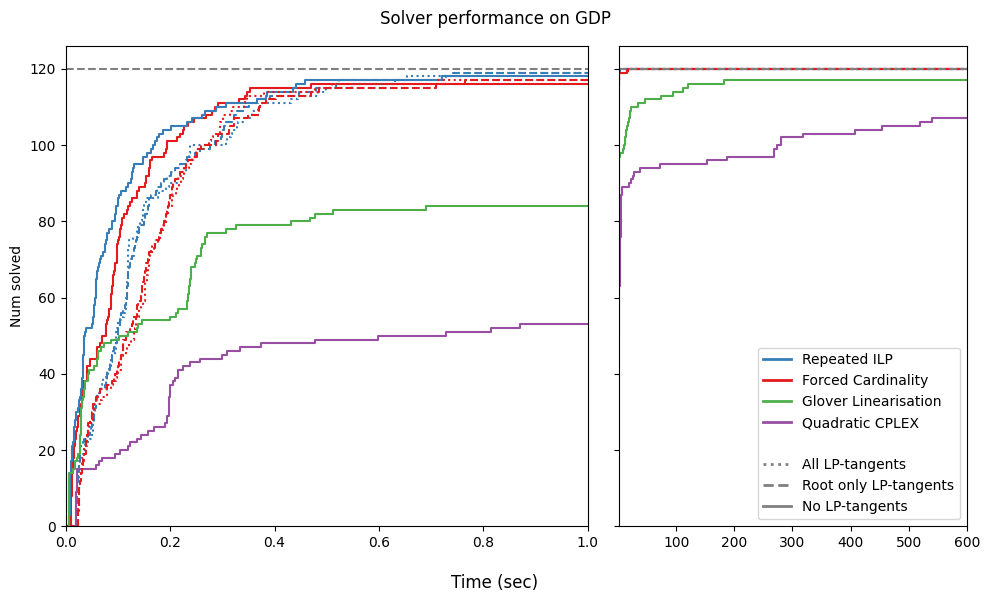

In [8]:
_df = df_gdp
pp = get_performance_profiles(_df)
middle_time = 1

CM = dict(zip(["fcard","repoa","glover","quad"],[mpl.colormaps["Set1"](i) for i in range(4)]))
LS = {"False": "-", "rootonly": "--", "True": ":"}
MS = {"False": "", "rootonly": "", "True": ""}

fig,axes=plt.subplots(1,2,sharey=True,width_ratios=[3,2],figsize=(10,6))
for ax in axes:
    for s, lpt in pp.keys():
        times, steps = pp[s, lpt]
        ax.step(times, steps, label=(s, lpt), where="post", color=CM[s], ls=LS[lpt], marker=MS[lpt])

axes[0].hlines(num_test_gdp,0,600,colors=["grey"],linestyles='dashed')
axes[1].hlines(num_test_gdp,0,600,colors=["grey"],linestyles='dashed')

axes[0].set_xlim(0,middle_time)
axes[0].set_ylim(bottom=0)
axes[1].set_xlim(middle_time,600)

#axes[1].set_xscale("log")
legend = [
    Line2D([0], [0], color=CM["repoa"], linewidth=2),
    Line2D([0], [0], color=CM["fcard"], linewidth=2),
    Line2D([0], [0], color=CM["glover"], linewidth=2),
    Line2D([0], [0], color=CM["quad"], linewidth=2),
    Line2D([0], [0], color="none", linewidth=2),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["True"],marker=MS["True"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["rootonly"],marker=MS["rootonly"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["False"],marker=MS["False"]),
]

axes[1].legend(legend,["Repeated ILP","Forced Cardinality","Glover Linearisation","Quadratic CPLEX","","All LP-tangents","Root only LP-tangents","No LP-tangents"],loc="lower right")

fig.supxlabel("Time (sec)")
axes[0].set_ylabel("Num solved")
fig.suptitle("Solver performance on GDP")
fig.tight_layout()
plt.savefig("fig/pp_gdp.pdf")
plt.show()

# Across Solvers

In [16]:
# Table with average solve time for varying 'n' values
result = df.groupby(['type', 'num', 'solver', 'lp_tangent'])['dev'].max().reset_index()
result_pivot = result.pivot_table(index=['type', 'num'], columns=['solver', 'lp_tangent'], values='dev').reset_index()
result_pivot = result_pivot[
            [(  'type',         ''),
            (   'num',         ''),
            ('repoa',     'True'),
            ('repoa', 'rootonly'),
            ('repoa',    'False'),
            ( 'fcard',     'True'),
            ( 'fcard', 'rootonly'),
            ( 'fcard',    'False'),
            ('glover',    'False'),
            (  'quad',    'False')]]
result_pivot

solver      type   num         repoa                                 fcard  \
lp_tangent                      True      rootonly     False          True   
0            CDP    50  1.043205e-15  1.043205e-15  0.000011  4.815846e-05   
1            CDP   150  5.916862e-05  5.916862e-05  0.000076  9.717067e-05   
2            CDP   500  4.384041e-05  4.384041e-05  0.000079  1.312007e-04   
3            GDP    50  8.992252e-05  8.992252e-05  0.000045  8.992252e-05   
4            GDP   150  7.389529e-05  7.389529e-05  0.000095  1.360687e-04   
5            GDP   500  1.119157e-04  1.119157e-04  0.000040  1.337692e-04   
6           RCDP  1000  1.653330e-04  1.653330e-04  0.000037  1.312262e-04   
7           RCDP  1500  1.365946e-04  1.365946e-04  0.000066  1.010210e-04   
8           RCDP  2000  1.477296e-04  1.477296e-04  0.000084  1.971398e-04   
9           RCDP  2500  1.294479e-04  1.294479e-04  0.000089  1.640290e-04   
10          RCDP  3000  1.449033e-04  1.449033e-04  0.000041  1.599051e-04   
11          RGDP  1000  0.000000e+00  0.000000e+00  0.000000  2.168824e-15   
12          RGDP  1500  0.000000e+00  0.000000e+00  0.000000  3.371301e-15   
13          RGDP  2000  0.000000e+00  0.000000e+00  0.000000  3.048318e-15   
14          RGDP  2500  0.000000e+00  0.000000e+00  0.000000  2.403878e-15   
15          RGDP  3000  0.000000e+00  0.000000e+00  0.000000  1.944077e-15   

solver                                    glover      quad  
lp_tangent      rootonly         False     False     False  
0           4.815846e-05  4.815846e-05  0.000048  0.000048  
1           9.717067e-05  9.717067e-05  0.000097  0.013611  
2           1.312007e-04  9.584756e-05  0.000942  4.811790  
3           8.992252e-05  8.992252e-05  0.000090  0.000090  
4           1.360687e-04  9.529155e-05  0.000095  0.000095  
5           1.337692e-04  1.123257e-04  0.000098  0.002843  
6           1.312262e-04  1.409843e-04       NaN       NaN  
7           1.436337e-04  1.353026e-04       NaN       NaN  
8           1.627888e-04  1.398066e-04       NaN       NaN  
9           1.640290e-04  1.640290e-04       NaN       NaN  
10          1.753467e-04  1.813398e-04       NaN       NaN  
11          2.168824e-15  2.168824e-15       NaN       NaN  
12          3.371301e-15  3.371301e-15       NaN       NaN  
13          3.048318e-15  3.048318e-15       NaN       NaN  
14          2.403878e-15  2.403878e-15       NaN       NaN  
15          1.944077e-15  1.944077e-15       NaN       NaN

In [10]:
# Table with average solve time for varying 'n' values
result = df.groupby(['type', 'num', 'solver', 'lp_tangent'])['solvetime'].mean().reset_index()
result_pivot = result.pivot_table(index=['type', 'num'], columns=['solver', 'lp_tangent'], values='solvetime').reset_index()
result_pivot = result_pivot[
            [(  'type',         ''),
            (   'num',         ''),
            ('repoa',     'True'),
            ('repoa', 'rootonly'),
            ('repoa',    'False'),
            ( 'fcard',     'True'),
            ( 'fcard', 'rootonly'),
            ( 'fcard',    'False'),
            ('glover',    'False'),
            (  'quad',    'False')]]
print(result_pivot.style.format(precision=4).to_latex())

\begin{tabular}{llrrrrrrrrr}
solver & type & num & \multicolumn{3}{r}{repoa} & \multicolumn{3}{r}{fcard} & glover & quad \\
lp_tangent &  &  & True & rootonly & False & True & rootonly & False & False & False \\
0 & CDP & 50 & 0.0656 & 0.0560 & 0.0349 & 0.0675 & 0.0732 & 0.0256 & 0.3123 & 109.6763 \\
1 & CDP & 150 & 0.2042 & 0.1851 & 0.1098 & 0.2146 & 0.2206 & 0.1579 & 32.5117 & 600.0009 \\
2 & CDP & 500 & 0.1622 & 0.1489 & 0.1420 & 0.5430 & 0.5034 & 0.7654 & 500.0613 & 586.6621 \\
3 & GDP & 50 & 0.0516 & 0.0493 & 0.0286 & 0.0450 & 0.0440 & 0.0206 & 0.0739 & 0.4484 \\
4 & GDP & 150 & 0.2306 & 0.2425 & 0.1455 & 0.1760 & 0.1732 & 0.1097 & 1.1257 & 56.3179 \\
5 & GDP & 500 & 0.2178 & 0.2044 & 0.2100 & 0.6547 & 0.7193 & 0.6191 & 65.8145 & 245.5700 \\
6 & RCDP & 1000 & 0.5851 & 0.5527 & 0.4728 & 3.8039 & 3.4206 & 3.2874 & nan & nan \\
7 & RCDP & 1500 & 0.7206 & 0.7472 & 0.4961 & 5.8795 & 5.0636 & 4.9584 & nan & nan \\
8 & RCDP & 2000 & 0.9291 & 0.9355 & 0.5296 & 10.5677 & 9.2850 & 8.0693 & 

```latex
\begin{tabular}{@{\extracolsep{4pt}}lrrrrrrrrr@{}}
\toprule
    &  & \multicolumn{3}{c}{\thead{Repeated }} & \multicolumn{3}{c}{\thead{Forced Cardinality} &  &  \\
 \cline{3-5}
 \cline{6-8}
\thead{Type}  & \thead{$n$} & \thead{All} & \thead{Root only} & \thead{None} & All & \thead{Root only} & \thead{None} & \thead{Glover\\Linearisation} & \thead{Quadratic\\\texttt{CPLEX}} \\
\midrule
CDP & 50 & 0.0656 & 0.0560 & 0.0349 & 0.0675 & 0.0732 & 0.0256 & 0.3123 & 109.6763 \\
CDP & 150 & 0.2042 & 0.1851 & 0.1098 & 0.2146 & 0.2206 & 0.1579 & 32.5117 & 600.0009 \\
CDP & 500 & 0.1622 & 0.1489 & 0.1420 & 0.5430 & 0.5034 & 0.7654 & 500.0613 & 586.6621 \\
\midrule
GDP & 50 & 0.0516 & 0.0493 & 0.0286 & 0.0450 & 0.0440 & 0.0206 & 0.0739 & 0.4484 \\
GDP & 150 & 0.2306 & 0.2425 & 0.1455 & 0.1760 & 0.1732 & 0.1097 & 1.1257 & 56.3179 \\
GDP & 500 & 0.2178 & 0.2044 & 0.2100 & 0.6547 & 0.7193 & 0.6191 & 65.8145 & 245.5700 \\
\midrule
RCDP & 1000 & 0.5851 & 0.5527 & 0.4728 & 3.8039 & 3.4206 & 3.2874 &  &  \\
RCDP & 1500 & 0.7206 & 0.7472 & 0.4961 & 5.8795 & 5.0636 & 4.9584 &  &  \\
RCDP & 2000 & 0.9291 & 0.9355 & 0.5296 & 10.5677 & 9.2850 & 8.0693 &  &  \\
RCDP & 2500 & 1.0937 & 1.0293 & 0.6010 & 14.1290 & 13.6099 & 11.7082 &  &  \\
RCDP & 3000 & 1.1478 & 1.0350 & 0.5860 & 15.2764 & 12.8296 & 10.2648 &  &  \\
\midrule
RGDP & 1000 & 0.5708 & 0.5640 & 0.2388 & 0.7528 & 0.7466 & 0.3704 &  &  \\
RGDP & 1500 & 0.7483 & 0.8205 & 0.3072 & 0.9375 & 0.9229 & 0.4594 &  &  \\
RGDP & 2000 & 0.9653 & 0.8686 & 0.3355 & 1.1568 & 1.0983 & 0.5655 &  &  \\
RGDP & 2500 & 1.0753 & 1.0424 & 0.3872 & 1.3457 & 1.2363 & 0.6157 &  &  \\
RGDP & 3000 & 1.2021 & 1.1458 & 0.4110 & 1.4407 & 1.2910 & 0.7226 &  &  \\
\bottomrule
\end{tabular}
```

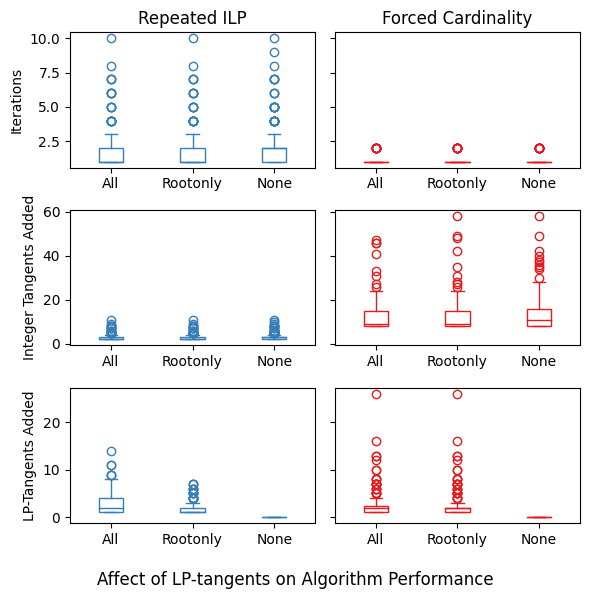

In [11]:
_df = df[(df["type"] == "CDP") | (df["type"] == "GDP")]

CM = dict(zip(["fcard","repoa","glover","quad"],[mpl.colormaps["Set1"](i) for i in range(4)]))
solvers = ["repoa","fcard"]
lp_tangent = ["True","rootonly","False"]
metrics = ["iterations","IPcuts","LPcuts"]
fig,axes = plt.subplots(len(metrics),2,sharey="row",figsize=(6,6))

for r in range(len(metrics)):
    for c in range(len(solvers)):
        bp = [_df[(_df["solver"]==solvers[c])&(_df["lp_tangent"]==lpt)][metrics[r]] for lpt in lp_tangent]
        col = CM[solvers[c]]
        axes[r,c].boxplot(bp,labels=["All","Rootonly","None"], 
            patch_artist=True,
            boxprops=dict(facecolor="None", color=col),
            capprops=dict(color=col),
            whiskerprops=dict(color=col),
            flierprops=dict(color=col, markeredgecolor=col),
            medianprops=dict(color=col),)

axes[0,0].set_ylabel("Iterations")
axes[1,0].set_ylabel("Integer Tangents Added")
axes[2,0].set_ylabel("LP-Tangents Added")
axes[0,0].set_title("Repeated ILP")
axes[0,1].set_title("Forced Cardinality")

fig.supxlabel("Affect of LP-tangents on Algorithm Performance")
fig.tight_layout()
plt.savefig("fig/lp_tan_impact.pdf")
plt.show()

# Random CDP

In [12]:
df_rcdp = df[df["type"] == "RCDP"]
num_test_rcdp = 150
timewindow_rcdp = 40

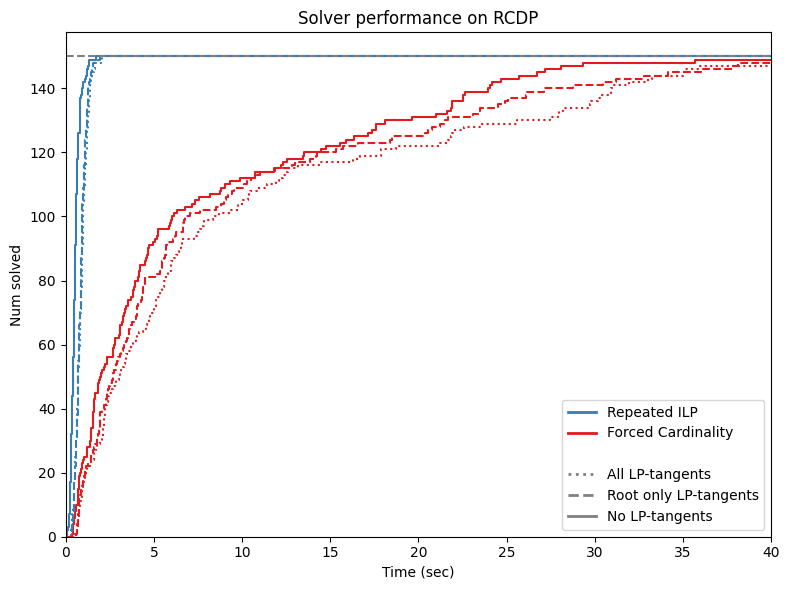

In [13]:
_df = df_rcdp
pp = get_performance_profiles(_df)

CM = dict(zip(["fcard","repoa","glover","quad"],[mpl.colormaps["Set1"](i) for i in range(4)]))
LS = {"False": "-", "rootonly": "--", "True": ":"}
MS = {"False": "", "rootonly": "", "True": ""}

fig,axes=plt.subplots(1,figsize=(8,6))
for s, lpt in pp.keys():
    times, steps = pp[s, lpt]
    axes.step(times, steps, label=(s, lpt), where="post", color=CM[s], ls=LS[lpt], marker=MS[lpt])

axes.hlines(num_test_rcdp,0,600,colors=["grey"],linestyles='dashed')

axes.set_ylim(bottom=0)
axes.set_xlim(0,timewindow_rcdp)

legend = [
    Line2D([0], [0], color=CM["repoa"], linewidth=2),
    Line2D([0], [0], color=CM["fcard"], linewidth=2),
    Line2D([0], [0], color="none", linewidth=2),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["True"],marker=MS["True"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["rootonly"],marker=MS["rootonly"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["False"],marker=MS["False"]),
]

axes.legend(legend,["Repeated ILP","Forced Cardinality","","All LP-tangents","Root only LP-tangents","No LP-tangents"],loc="lower right")

axes.set_xlabel("Time (sec)")
axes.set_ylabel("Num solved")
axes.set_title("Solver performance on RCDP")
fig.tight_layout()
plt.savefig("fig/pp_rcdp.pdf")
plt.show()

# Random GDP

In [14]:
df_rgdp = df[df["type"] == "RGDP"]
num_test_rgdp = 300
timewindow_rgdp = 3

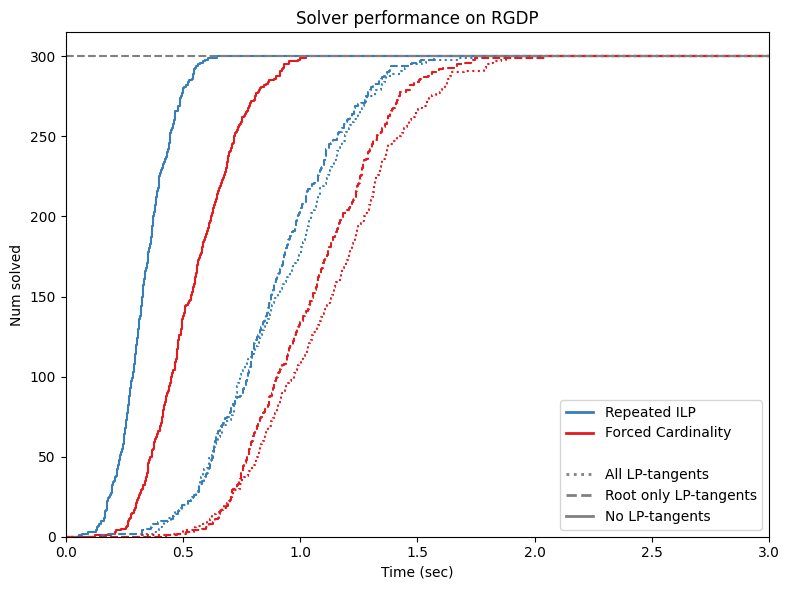

In [15]:
_df = df_rgdp
pp = get_performance_profiles(_df)

CM = dict(zip(["fcard","repoa","glover","quad"],[mpl.colormaps["Set1"](i) for i in range(4)]))
LS = {"False": "-", "rootonly": "--", "True": ":"}
MS = {"False": "", "rootonly": "", "True": ""}

fig,axes=plt.subplots(1,figsize=(8,6))
for s, lpt in pp.keys():
    times, steps = pp[s, lpt]
    axes.step(times, steps, label=(s, lpt), where="post", color=CM[s], ls=LS[lpt], marker=MS[lpt])

axes.hlines(num_test_rgdp,0,600,colors=["grey"],linestyles='dashed')

axes.set_ylim(bottom=0)
axes.set_xlim(0,timewindow_rgdp)

#axes[1].set_xscale("log")
legend = [
    Line2D([0], [0], color=CM["repoa"], linewidth=2),
    Line2D([0], [0], color=CM["fcard"], linewidth=2),
    Line2D([0], [0], color="none", linewidth=2),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["True"],marker=MS["True"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["rootonly"],marker=MS["rootonly"]),
    Line2D([0], [0], color="grey", linewidth=2,linestyle=LS["False"],marker=MS["False"]),
]

axes.legend(legend,["Repeated ILP","Forced Cardinality","","All LP-tangents","Root only LP-tangents","No LP-tangents"],loc="lower right")

axes.set_xlabel("Time (sec)")
axes.set_ylabel("Num solved")
axes.set_title("Solver performance on RGDP")
fig.tight_layout()
plt.savefig("fig/pp_rgdp.pdf")
plt.show()